~Malki Malov
322379876

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries and open files:


In [ ]:

!pip install biopython
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd

partA_file_path="/content/drive/MyDrive/ביואינפורמטיקה/שנה ג/ביואינפורמטיקה מבנית/HW1/protSeq.txt"
partB_file_path="/content/drive/MyDrive/ביואינפורמטיקה/שנה ג/ביואינפורמטיקה מבנית/HW1/uniprot_sprot.fasta"



     |████████████████████████████████| 2.3 MB 6.4 MB/s 
ERROR: Operation cancelled by user


#Part A

In [ ]:
class seq():
  'The class provide some analysis for a protein sequence and contains 3 methods: PI, mass, numRes'
  def __init__(self, seq):
    self.protein_seq=seq.upper()

  def __str__(self):
    PI=self.PI()
    mass=self.mass()
    numRes=self.numRes()
    return "Sequence: %s \n\
    PI: %.1f \n\
    Mass: %d \n\
    Number of Residues: %d \n "\
    % (self.protein_seq, PI, mass, numRes)

  def PI(self,steps=0.1):
    """
    Calculate the pI (pH value with natural charge on the protein)
    steps: int/ float. Spacing between values in pH range
    """
    charges = {'D':-1, 'E':-1, 'H':1, 'C':-1,
               'Y':-1, 'K':1, 'R':1, 'N-ter':1, 'C-ter':-1}  #1 means base and -1 means acid
    pK={'N-ter':7.5,'C-ter':3.55,'C':9,
        'D':4.05,'E':4.45,'H':5.98,'K':10,'R':12,'Y':10}

    minPI=[0,10000000000]  #the lowest pH, [pH, charge]
    for pH in numpy.arange(0,14,steps): #for each pH from 0 to 14
      sum=1/(1+pow(10,pH-pK['N-ter']))-1/(1+pow(10,pK['C-ter']-pH))  #initial the sum to charge of terminal C and N
      for aa in self.protein_seq: 
        if aa in charges.keys(): #is a charged residue
          sum+=charges[aa]/(1+pow(10,charges[aa]*(pH-pK[aa])))
      if abs(sum)<minPI[1]:  #look for thק pH wich closest to zero
        minPI=[pH,sum]
    return minPI[0]

    
  def mass(self):
    """
    Return the protein mass
    """
    weights = {'A':89, 'R':174, 'N':132, 'D':133, 'B':133,
               'C':121, 'Q':146, 'E':147, 'Z':147, 'G':75,
               'H':155, 'I': 131, 'L':131, 'K':146, 'M':149,
               'F':165, 'P':115, 'S':105, 'T':119, 'W':204, 
               'Y':181, 'V':117}
    weight_per_aa=[weights[x] for x in self.protein_seq]  #calc the weight of each aa
    return sum(weight_per_aa)
    

  def numRes(self):
    """
    Return the number of residues in the protein
    """
    return len(self.protein_seq)


In [ ]:
#running example
file = open(partA_file_path, "a")
for i in SeqIO.parse(partA_file_path, "fasta"):
  sequence=seq(i.seq)
  print("ID: %s" %(i.id))
  print(sequence)


ID: Human_ubi
Sequence: MQIFVKTRKGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG 
    PI: 9.1 
    Mass: 9975 
    Number of Residues: 76 
 
ID: Chimpanzee_ubi
Sequence: MQIFVKTLETGKTITLEVEPSDTIENVKAKIQDKEGIPPEEDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG 
    PI: 5.1 
    Mass: 10346 
    Number of Residues: 79 
 
ID: Cow_ubi
Sequence: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG 
    PI: 6.8 
    Mass: 9905 
    Number of Residues: 76 
 
ID: Zebra-fish_ubi
Sequence: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKDEEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG 
    PI: 5.3 
    Mass: 10185 
    Number of Residues: 78 
 


#Part B

In [ ]:
PI_list = []
PI_file = open(partB_file_path, "a")  #open the file
for s in SeqIO.parse(partB_file_path, "fasta"):  #for each sequence
  if "OS=Homo sapiens" in s.description:  #if its a human protein
    peptide = seq(s.seq)
    PI_list.append(peptide.PI())  #calc the PI and add to the list



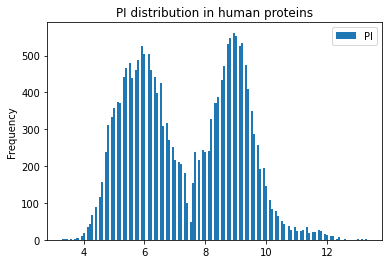

In [ ]:
df = pd.DataFrame(PI_list,columns=["PI"])
df.plot.hist(bins=150, title="PI distribution in human proteins")

It can be seen that the most common PI values are 6 and 8.5
A possible explanation for this is that proteins tend to dissolve the more charge they have
Therefore the most common values are different from 7 (the pH in the human body), so that the proteins in the human body can dissolve
Of course, the PI can not be extreme - too low or too high

#Part C

In [ ]:
class TrieNode():
  
  def __init__(self, l="root"):
    self.letter=l
    self.children={"END":False}
  

  def insert(self, word):
    'recursive function. insert a word to the Trie'

    if word=="":  #there are no more letters
      self.children["END"]=True  #change the value of "END", a flag of word ending
      return
    if word[0] not in self.children.keys():  #the next letter not in the children dict
      self.children[word[0]]=TrieNode(word[0])  #create a new node for the next letter
    self.children[word[0]].insert(word[1:])  #continue to insert the word

    
  def is_exist(self, word):
    'return TRUE if the word exist in the TRIE, and else if it not'
    
    if word=="":  #there are no more letters
      if self.children["END"]:  #and the 'END' flag is TRUE
        return True
      else:  #the 'END' flag is FALSE so the word doesn't exist
        return False
    if word[0] not in self.children.keys():  #the next letter soesn't exist in the children dictionary
      return False
    return self.children[word[0]].is_exist(word[1:])  #continue
    


#running example
a=TrieNode()
a.insert("sami")
a.insert ("uzi")

print(a.is_exist("uzi"))
print(a.is_exist("sami"))
print(a.is_exist("samir"))
print(a.is_exist("ami"))
print(a.is_exist("rami"))

    

True
True
False
False
False
